<a href="https://colab.research.google.com/github/Hustens0hn/fastai/blob/master/lesson1_pets_selfmade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book

     |████████████████████████████████| 727kB 9.2MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 194kB 19.1MB/s 
     |████████████████████████████████| 1.2MB 19.1MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.


<function fastbook.setup_book>

In [2]:
from fastbook import *

In [3]:
%matplotlib inline

In [4]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(2)

In [5]:
bs = 64

In [6]:
doc(untar_data)

In [7]:
path = untar_data(URLs.PETS)
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [8]:
Path.BASE_PATH = path

In [9]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [10]:
fnames = get_image_files(path/'images')

In [11]:
fnames[0]

Path('images/saint_bernard_146.jpg')

In [12]:
#PILImage.create(fnames[0])

In [13]:
reg = r'images/(.+)_\d+\.jpg$'

In [14]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = RegexLabeller(reg),
    splitter = RandomSplitter(),
    item_tfms = Resize(224)
)

In [15]:
dls = dblock.dataloaders(path/'images')

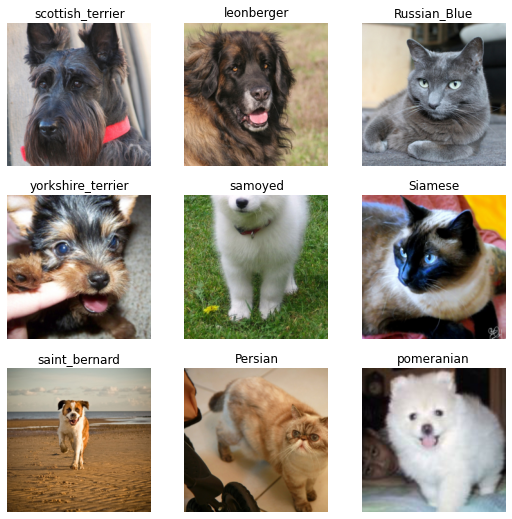

In [16]:
dls.train.show_batch()

In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=2.290867705596611e-05, lr_steep=6.309573450380412e-07)

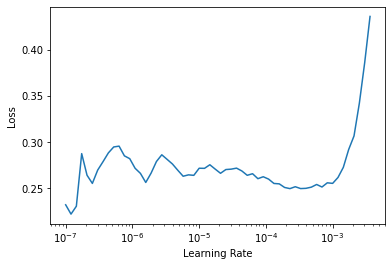

In [19]:
learn.lr_find()

In [18]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.492686,1.068328,0.317321,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.433057,0.917034,0.265223,00:55
